  # PREDIRE LA QUALITE DE LA COUPE A PARTIR DES AUTRES CARACTERISTIQUES

In [1116]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1117]:
diamond = sns.load_dataset("diamonds")

## OBJECTIF :
## III. Prédire la qualité de la coupe en fonction des autres caractéristiques avec 90% d'exactitude

In [336]:
data = diamond.copy()
#pd.set_option('display.max_row', nombre de colonnes)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 1. EXPLORATORY DATA ANALYSIS

- **IDENTIFICATION DE LA TARGET :** "cut"

- **NOMBRES DE LIGNES ET DE COLONNES :** (53940, 10)


- **TYPE DE VARIABLES :** float64 =    6, category  =  1, category =   1, category   = 1, int64  =     1

- **IDENTIFIER LES VALEURS MANQUANTES :** Aucune valeurs manquantes

- **VISUALISER LA TARGUET :** Il y a beaucoup plus de diamants ayant de meilleurs coupes(88% ideal, premium et very good) que de diamants de mauvaises coupes (12% good et fair). **Ce dataset est alors constitué de classes déséquilibrés**

- COMPREHENSION DES VARIABLES : Aucune valeurs n'est normale

- VISUALISATION DES RELATIONS FEATURES-TARGUET :

- IDENTIFICATION DES OUTLIERS :

In [6]:
data.shape

(53940, 10)

In [11]:
#data.info()
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [16]:
#data.dtypes.value_counts().plot.pie()
data.dtypes.value_counts()

float64     6
category    1
category    1
category    1
int64       1
Name: count, dtype: int64

In [22]:
#data.isnull().sum()
(data.isna().sum()/data.shape[0]*100).sort_values(ascending = True)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [21]:
#plt.figure(figsize = (12, 6))
#sns.heatmap(data.isna(), cbar = False) # pour avoir la heatmap des valeur manquantes

In [51]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


L'analyse descriptive me montre qu'il y a des valeurs aberrantes qui sont situées dans les colonnes x, y et z. En effet le minimum de ces valeurs est 0 pourtant cela n'est pas realiste.

In [52]:
data.describe(include = 'category')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


**1. RETIRER LES VALEURS ABERRANTES**

In [94]:
print((data["x"]==0).value_counts())
print((data["y"]==0).value_counts())
print((data["z"]==0).value_counts())

x
False    53932
True         8
Name: count, dtype: int64
y
False    53933
True         7
Name: count, dtype: int64
z
False    53920
True        20
Name: count, dtype: int64


In [1118]:
data = data.drop(data[data["z"]==0].index)
#data[(data["z"]==0)&(data["x"]==0)&(data["y"]==0)]
data.describe()

,carat,depth,table,price,x,y,z,cut_encoded
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,1.095772
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,1.116579
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,1.000000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,2.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000


In [338]:
data.shape

(53920, 10)

**2. VISUALISER LA TARGUET "CUT"**

In [123]:
print(data["cut"].value_counts(normalize = True))

cut
Ideal        0.399629
Premium      0.255564
Very Good    0.224054
Good         0.090912
Fair         0.029841
Name: proportion, dtype: float64


         cut  count
0      Ideal  21548
1    Premium  13780
2  Very Good  12081
3       Good   4902
4       Fair   1609


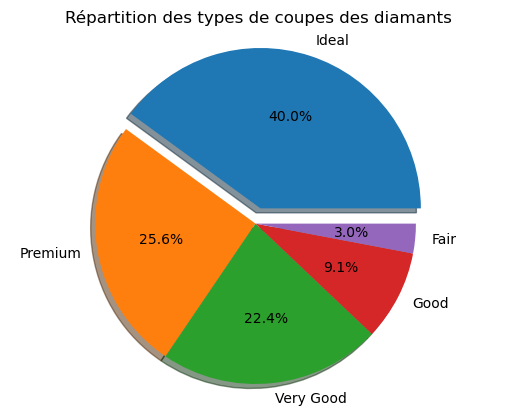

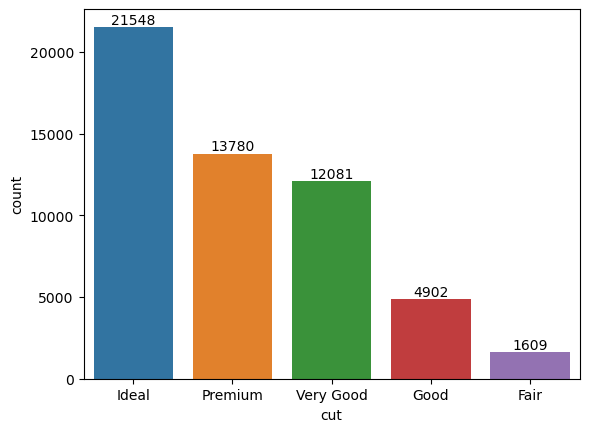

In [124]:
#Nombre de valeurs par modalité
coupe = data["cut"].value_counts().reset_index()
print(coupe)

#visualisation sous matplotlib
explode = (0.1, 0, 0, 0, 0) # only "explode" the 1st slice (i.e.'Hogs')
 
fig1, ax1 = plt.subplots()
ax1.pie(coupe["count"], labels=coupe["cut"], explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Répartition des types de coupes des diamants')
plt.show()

#visualisation sous seaborn
sns.barplot(x='cut', y='count', data = coupe)

for i, freq in enumerate(coupe["count"]):
    plt.text(i, freq, str(freq), ha='center', va="bottom")
    
plt.show()

Il y a beaucoup plus de diamants ayant de meilleurs coupes (very good, premuim and ideal) que de diamants de moins bonnes coupes (good and fair). **Ce dataset est alors constitués de classes déséquilibrés**

Il faudra aliors utiliser une métrique comme la sensibilite ou la precision

**3. HISTOGRAMMES DES VARIABLES CONTINUES**

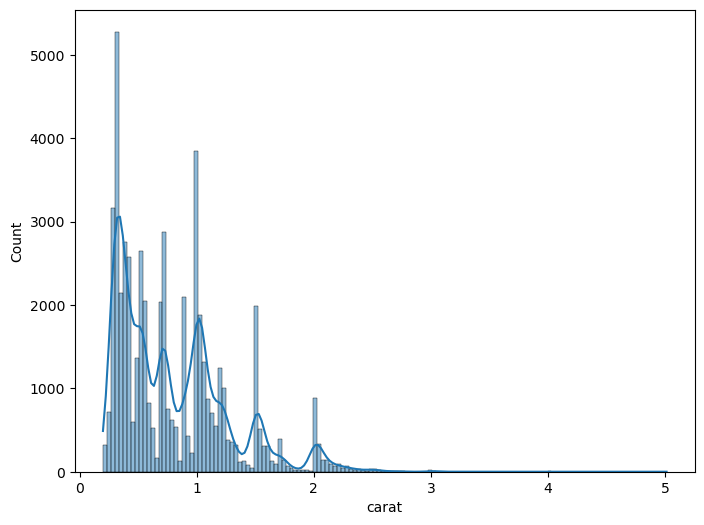

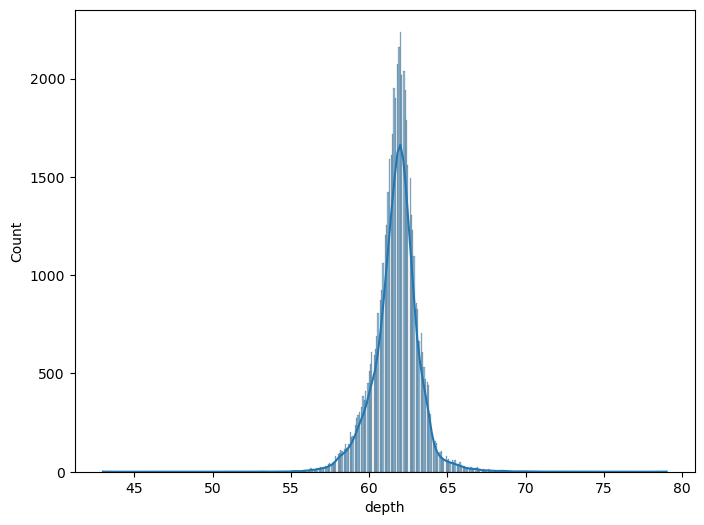

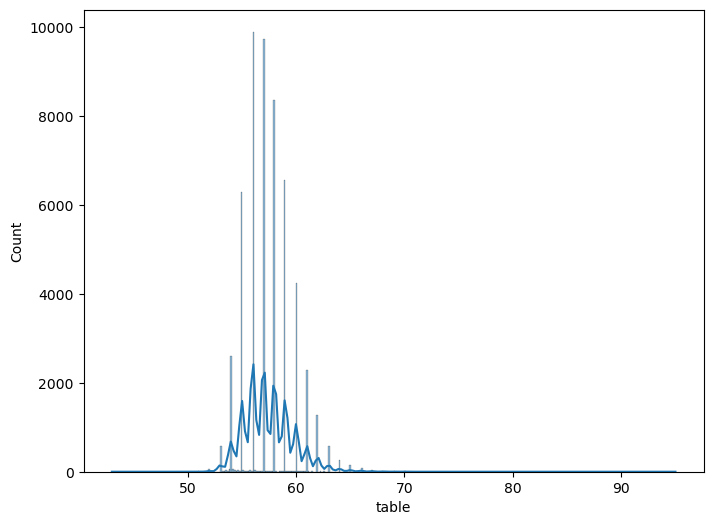

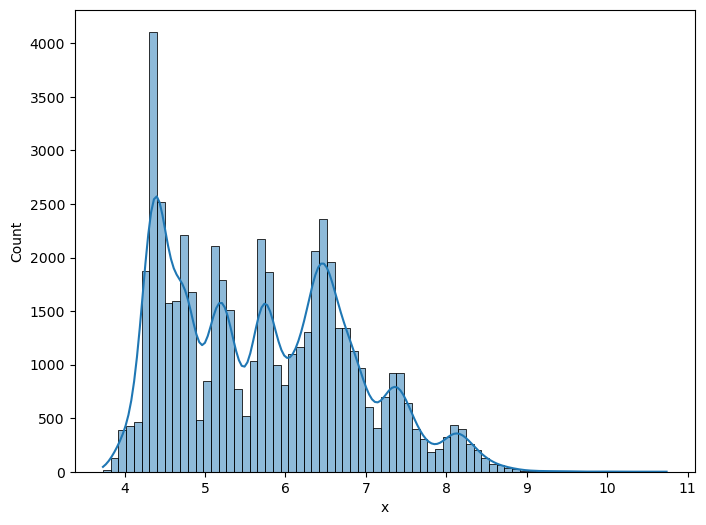

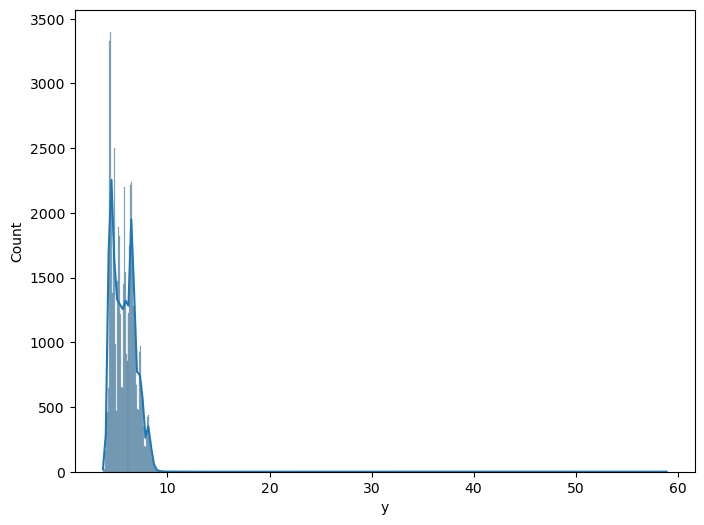

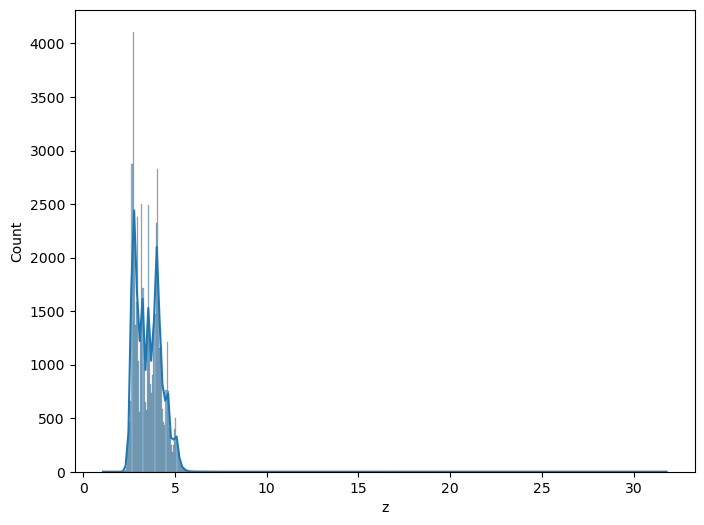

In [128]:
for col in data.select_dtypes('float') :
    #print(col)
    plt.figure(figsize=(8,6))
    sns.histplot(data[col], kde=True)      # pour afficher la distribution des variables

In [126]:
from scipy import stats

for col in data.select_dtypes('float') :
    # Calcul du skewness et du kurtosis
    skewness = stats.skew(data[col])
    kurtosis = stats.kurtosis(data[col],fisher=False)#Vrai kurtosis
    print(f"\nSkewness '{col}': {skewness}")
    print(f"Kurtosis réel '{col}': {kurtosis}")


Skewness 'carat': 1.1161764230767832
Kurtosis réel 'carat': 4.255011853451095

Skewness 'depth': -0.08172422481120903
Kurtosis réel 'depth': 8.745662978239132

Skewness 'table': 0.7967773253895398
Kurtosis réel 'table': 5.801366547991719

Skewness 'x': 0.39833641878127574
Kurtosis réel 'x': 2.2963928503614173

Skewness 'y': 2.4621421115578563
Kurtosis réel 'y': 94.8176119419642

Skewness 'z': 1.5854456596485427
Kurtosis réel 'z': 50.760030655230416


**skewness (asymetrie) :** 
                       
                       - proche de 0 alors distribution symétrique,
                       - inférieur à 0 alors courbe asymétrique vers la gauche(les valeurs inférieurs sont plus fréquents)
                       - supérieur à 0 alors courbe asymétrique vers la droite(les valeurs supérieures sont plus fréquentes)
                       
**kurtosis (aplatissement) :** 
                           
                           - proche de 3 alors distribution symétrique,
                           - inférieur à 3 alors valeurs extrêmes moins fréquentes
                           - supérieur à 3 alors valeurs extrêmes plus fréquentes

Aucune variable n'est symétrique

**4. HISTOGRAMME DE LA VARIABLE "PRICE"**

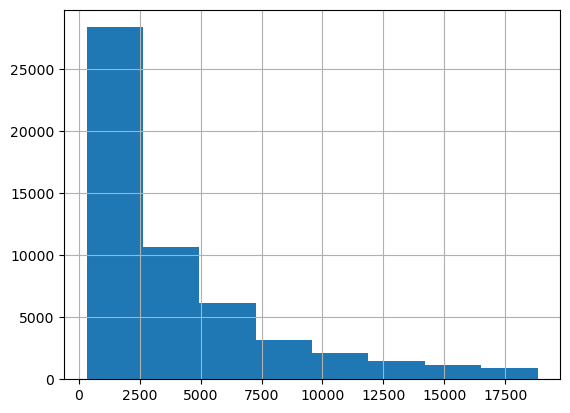

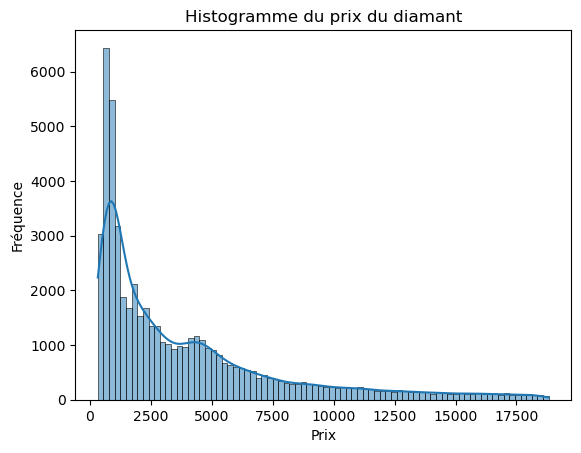

<Axes: >

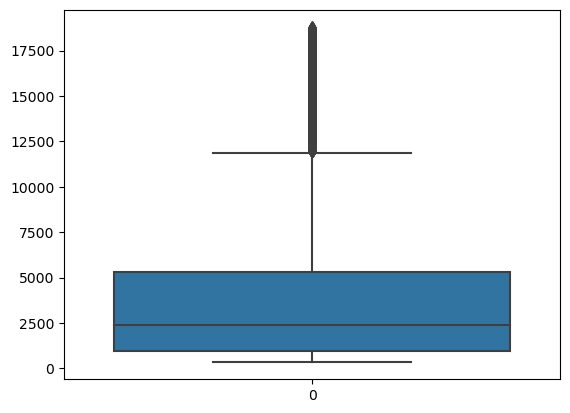

In [131]:
# Histogramme avec pandas
diamond["price"].hist(bins = 8)

#Choix d'une variable
price = diamond["price"]
plt.show()

# Histogramme avec seaborn
sns.histplot(x=price, kde=True)
plt.title("Histogramme du prix du diamant")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

#boxplot avec seaborn
sns.boxplot(diamond["price"])

L'analyse de la variable price montre qu'il n'a pas beaucoup de valeurs extrêmes mais les prix ne sont pas uniformément répartis

**5. VISUALISER LES DIFFERENTES CATEGORIES**

In [146]:
for col in data.select_dtypes('category') :
    print(f'{col} -----------------------> {data[col].unique()}')

cut -----------------------> ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color -----------------------> ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity -----------------------> ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


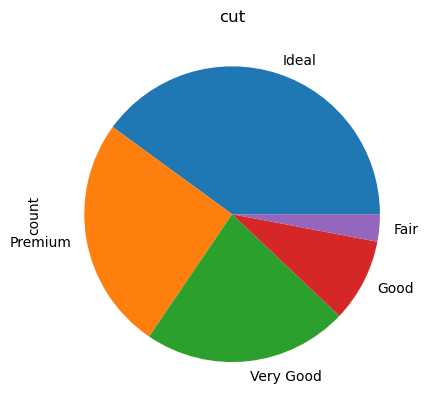

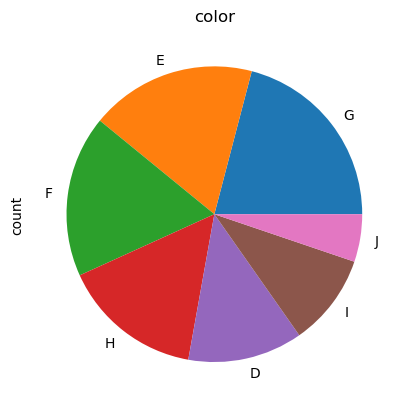

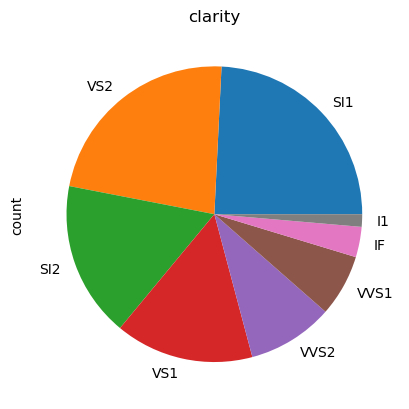

In [133]:
for col in data.select_dtypes('category') :
    plt.figure()
    data[col].value_counts().plot.pie()
    plt.title(f'{col}')

**RELATION TARGUET / VARIABLES**

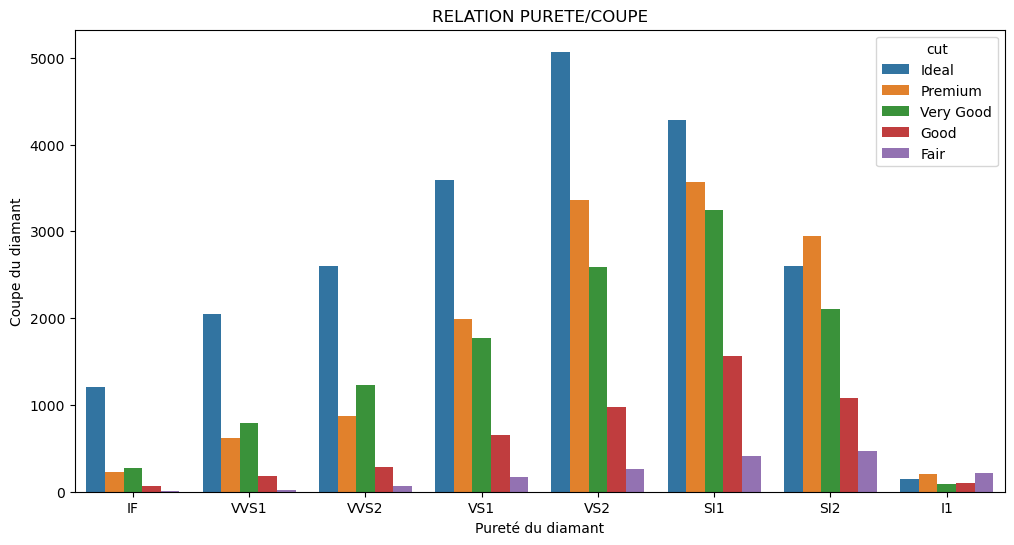

In [134]:
plt.figure(figsize=(12,6))
sns.countplot(x='clarity', hue='cut', data=data)
plt.title("RELATION PURETE/COUPE")
plt.xlabel('Pureté du diamant')
plt.ylabel('Coupe du diamant')
plt.show()

Quelque soit la pureté du diamant, il y a toujours beaucoup plus de diamant de meilleurs coupes que celles de moins bonnes coupes

Mêmes pour les diamants les plus purs, il y a toutes les coupes

In [135]:
data.groupby("clarity")["cut"].value_counts()

clarity  cut      
IF       Ideal        1212
         Very Good     268
         Premium       230
         Good           71
         Fair            9
VVS1     Ideal        2047
         Very Good     789
         Premium       615
         Good          186
         Fair           17
VVS2     Ideal        2606
         Very Good    1235
         Premium       870
         Good          286
         Fair           69
VS1      Ideal        3589
         Premium      1989
         Very Good    1775
         Good          648
         Fair          169
VS2      Ideal        5069
         Premium      3356
         Very Good    2590
         Good          978
         Fair          261
SI1      Ideal        4282
         Premium      3573
         Very Good    3240
         Good         1560
         Fair          408
SI2      Premium      2944
         Ideal        2597
         Very Good    2100
         Good         1078
         Fair          466
I1       Fair          210
         

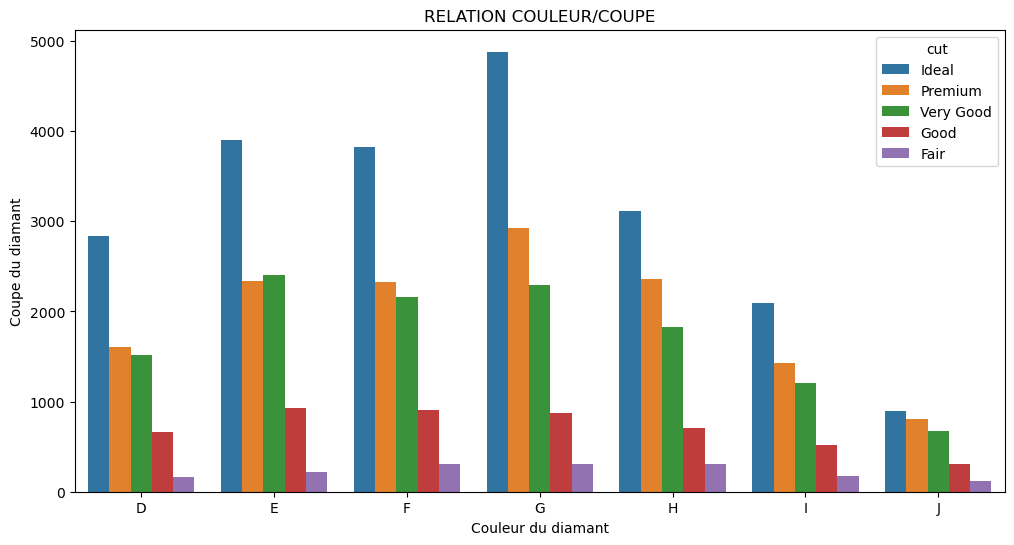

In [136]:
plt.figure(figsize=(12,6))
sns.countplot(x='color', hue='cut', data=data)
plt.title("RELATION COULEUR/COUPE")
plt.xlabel('Couleur du diamant')
plt.ylabel('Coupe du diamant')
plt.show()

Peu importe la couleur on peut avoir toutes les coupes

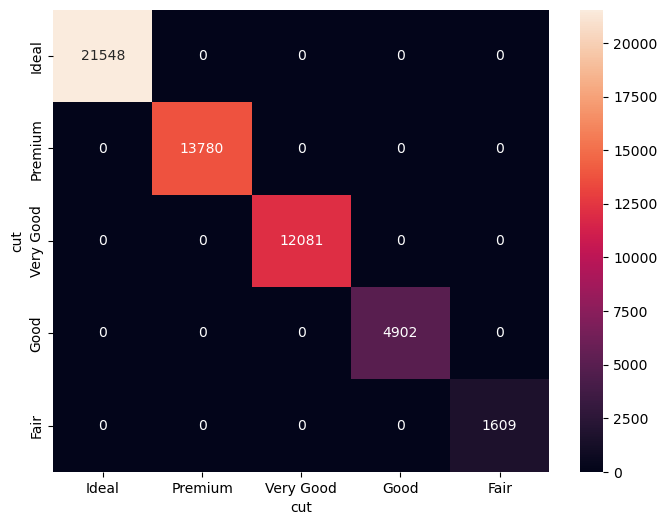

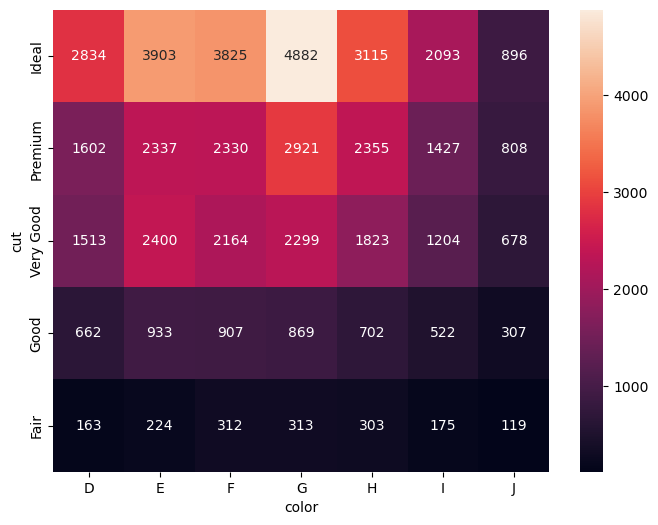

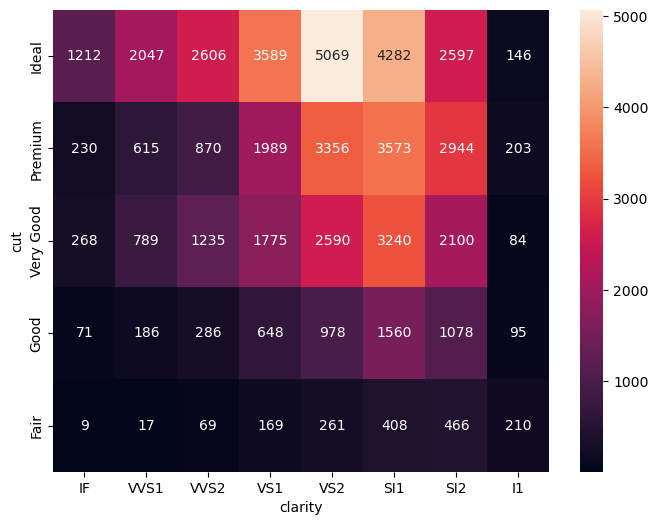

In [137]:
for col in data.select_dtypes('category') :
    #print(col)
    plt.figure(figsize=(8,6))
    sns.heatmap(pd.crosstab(data['cut'], data[col]), annot=True, fmt='d')      # pour afficher la distribution des variable

<Axes: xlabel='cut', ylabel='price'>

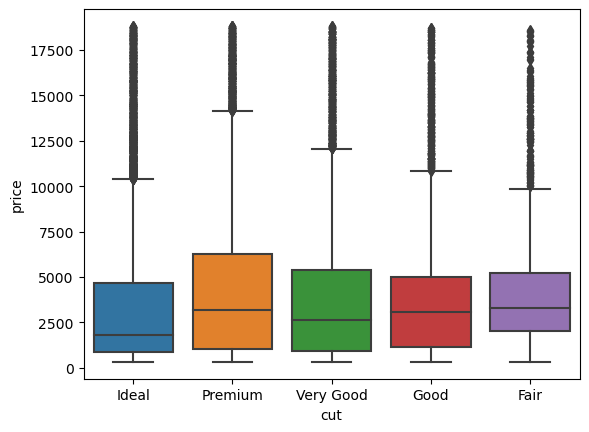

In [138]:
#Relation entre le type de coupe et le prix
sns.boxplot(x='cut', y='price', data=data)

<Axes: xlabel='price', ylabel='Density'>

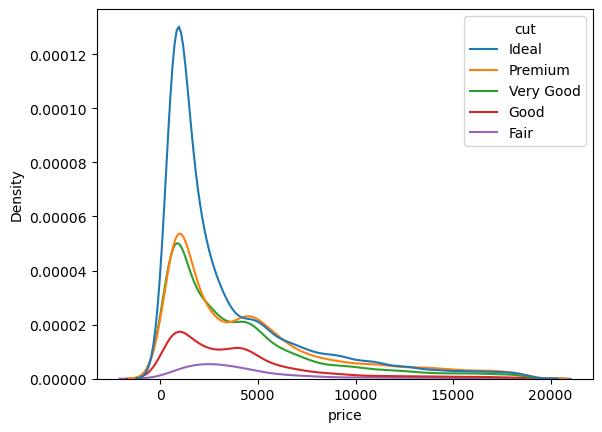

In [339]:
sns.kdeplot(data=data, x='price', hue='cut')      # pour afficher la distribution des variable

Il y a beaucoup de valeurs extrêmes pour toutes les chaque type de coupes qu'il va falloir traiter car ils donnent l'impression qu'à partir d'un certain prix, toutes les coupes se valent.

J'ai ausssi l'impression qu'une fois les valeurs extrêmes traitées, je pourrais mieux identifier chaque coupe.

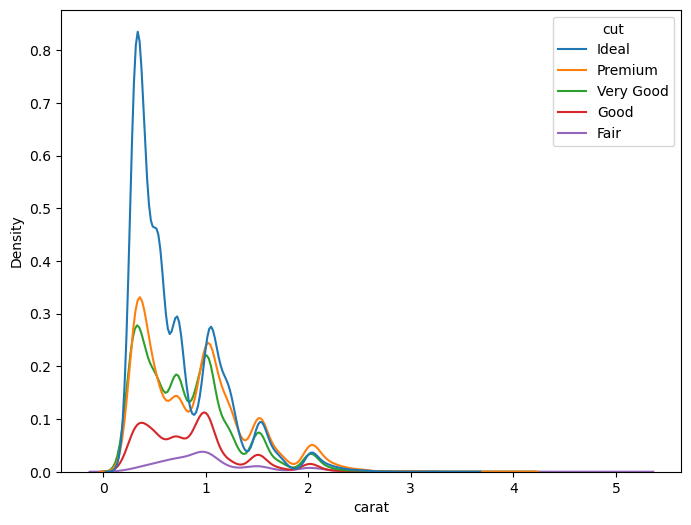

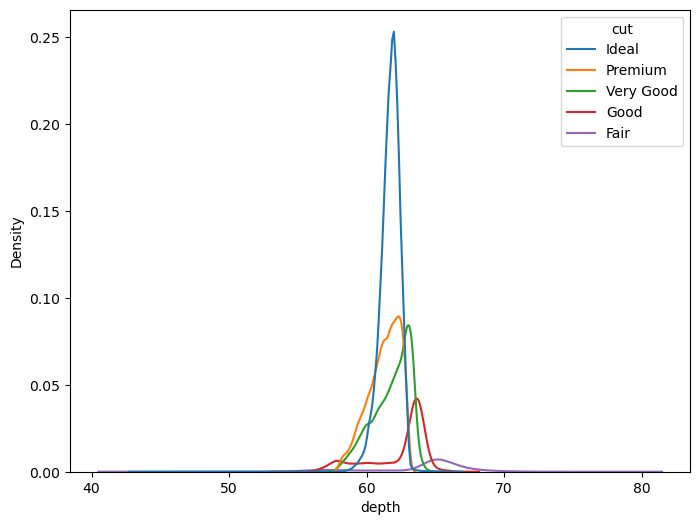

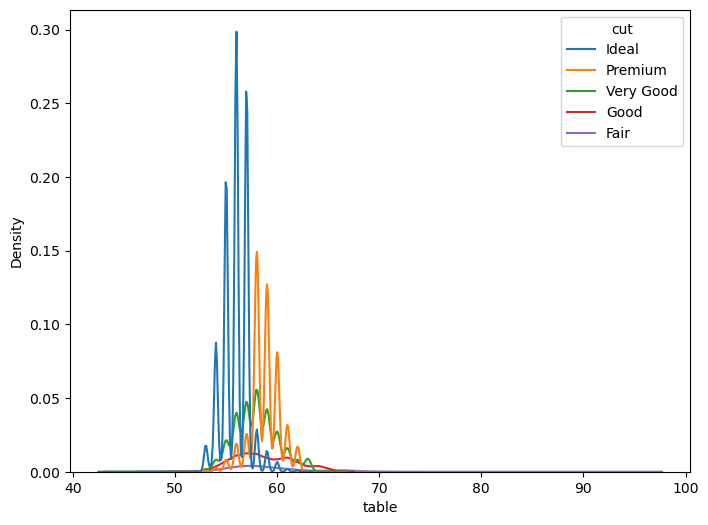

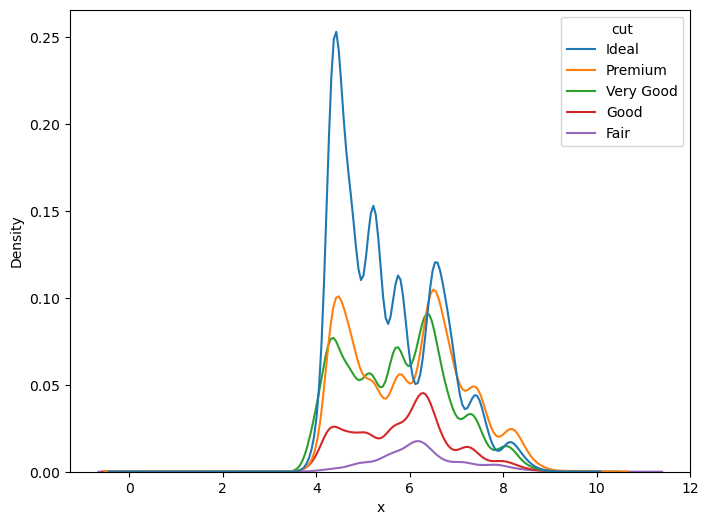

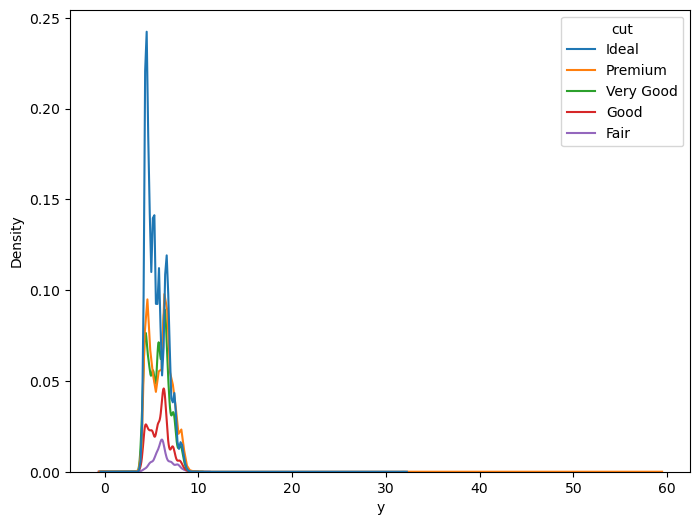

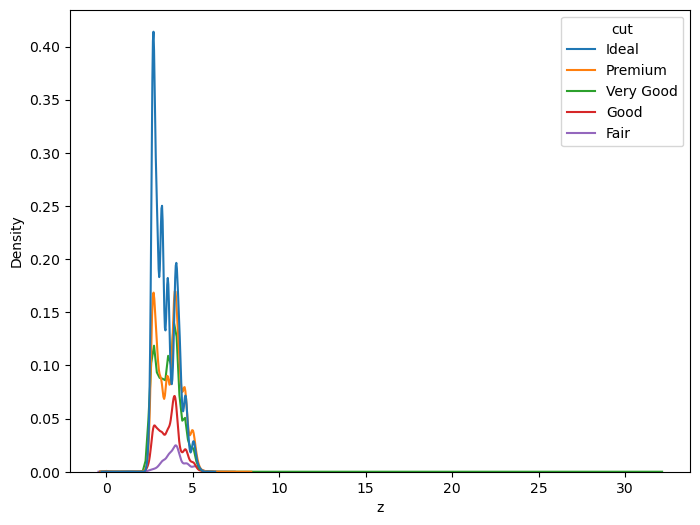

In [72]:
for col in data.select_dtypes('float') :
    #print(col)
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=data, x=col, hue='cut')      # pour afficher la distribution des variable

La variable 'table' peut nous permettre de mieux différencier toutes les coupes

**RELATION VARIABLE / VARIABLE**

C:\Users\SOP TELECOM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


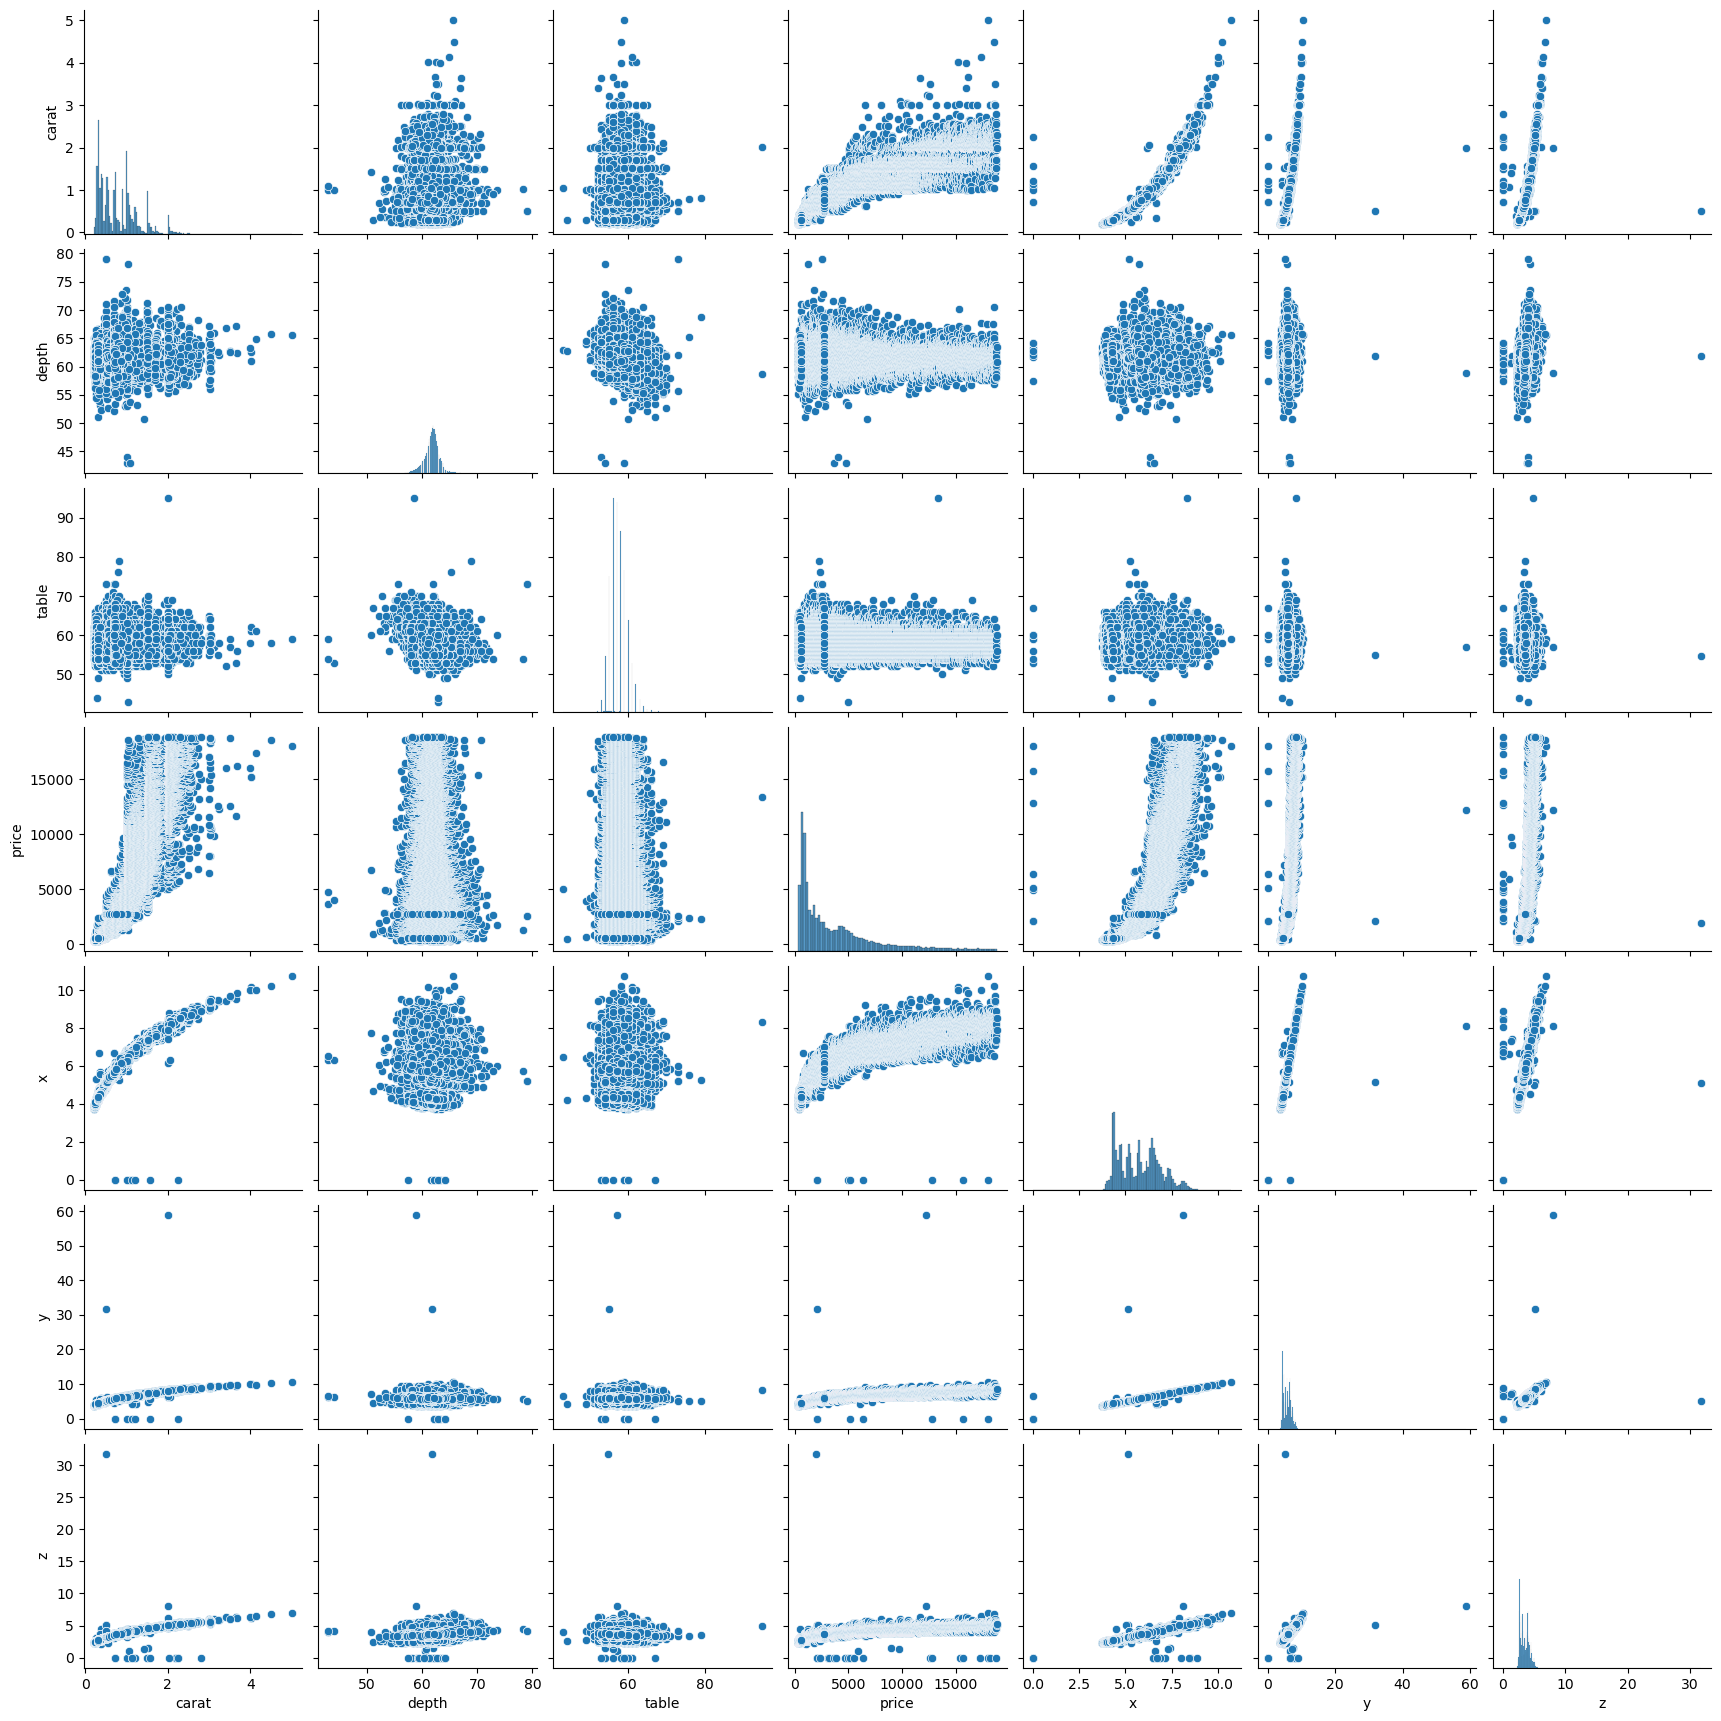

In [87]:
sns.pairplot(data)

pOUR MIEUX VISUALISER NOUS ALLONS FAIRE LA HEATMAP

<Axes: >

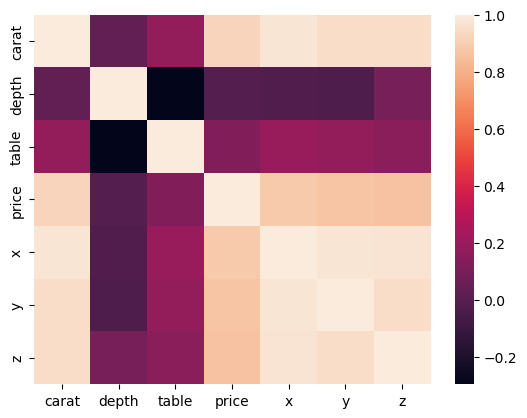

In [89]:
quant_var = ['carat', "depth", "table",'price', 'x','y','z']
#diamond_quant = diamond[quant_var]
sns.heatmap(data[quant_var].corr())

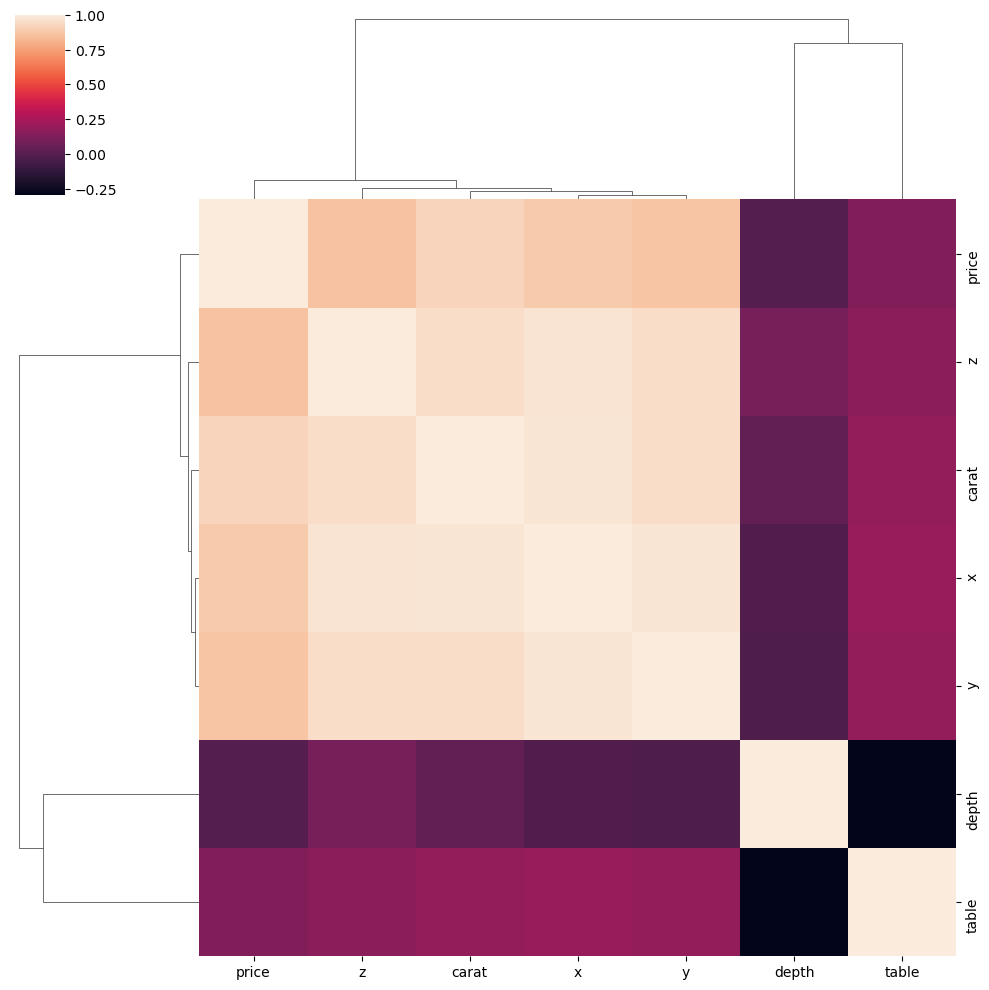

In [90]:
quant_var = ['carat', "depth", "table",'price', 'x','y','z']
#diamond_quant = diamond[quant_var]
sns.clustermap(data[quant_var].corr())

certaines valeurs sont très corrélées, à surveiller

## 2. PREPROCESSING

In [1121]:
data = diamond.copy()
data = data.drop(data[data["z"]==0].index)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [1122]:
data.shape

(53920, 10)

In [1123]:
#quant_var = ['cut', "depth", "table",'price', 'x','y']
#data = data[quant_var]

In [427]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size = 0.2, random_state=0 )

In [428]:
trainset['cut'].value_counts(normalize=True)

cut
Ideal        0.399272
Premium      0.255286
Very Good    0.225287
Good         0.090736
Fair         0.029419
Name: proportion, dtype: float64

In [429]:
testset['cut'].value_counts(normalize=True)

cut
Ideal        0.401057
Premium      0.256677
Very Good    0.219121
Good         0.091617
Fair         0.031528
Name: proportion, dtype: float64

**2.1. ENCODAGE**

In [1124]:
def encodage(df):
    codes = {
        'I1' : 1,
        'SI2' : 2,
        'SI1' : 3,
        'VS2' : 4,
        'VS1' : 5,
        'VVS2': 6,
        'VVS1' : 7,
        'IF' : 8,
        'Fair' : 1,
        'Good' : 2,
        'Very Good' : 3,
        'Premium' : 4,
        'Ideal' : 5,
        'J' : 1,
        'I' : 2,
        'H' : 3,
        'G' : 4,
        'F' : 5,
        'E' : 6,
        'D' : 7}
    
    for col in df.select_dtypes('category') :
        df[col] = df[col].map(codes)
        
    return df

In [1125]:
def feature_engineering(df):
    df['volume'] = df['x']*df['y']*df['z']
    return df.drop(['x', 'y', 'z'], axis=1)

In [1126]:
def imputation(df):
    return df.dropna(axis=0)

In [1127]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    #df = feature_engineering(df)
    
    X = df.drop('cut', axis=1)
    y = df['cut']
    
    #print(y.value_counts())
    
    return X, y

In [434]:
X_train, y_train = preprocessing(trainset)

cut
5    17223
4    11012
3     9718
2     3914
1     1269
Name: count, dtype: int64


In [435]:
X_test, y_test = preprocessing(testset)

cut
5    4325
4    2768
3    2363
2     988
1     340
Name: count, dtype: int64


**2.2. PREPROCESSING**

In [466]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size = 0.2, random_state=0 )
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [467]:
def evaluation(model):
    
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred ))
    print(classification_report(y_test, ypred ))
    
    #VERIFICATION DES COURBES D'APPRENTISSAGE
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='accuracy',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [468]:
model = RandomForestClassifier(random_state=0)

[[ 304   27    5    3    1]
 [  26  690  225   31   16]
 [   2  136 1296  425  504]
 [   0   17  220 2212  319]
 [   5    9  175  162 3974]]
              precision    recall  f1-score   support

           1       0.90      0.89      0.90       340
           2       0.78      0.70      0.74       988
           3       0.67      0.55      0.61      2363
           4       0.78      0.80      0.79      2768
           5       0.83      0.92      0.87      4325

    accuracy                           0.79     10784
   macro avg       0.79      0.77      0.78     10784
weighted avg       0.78      0.79      0.78     10784



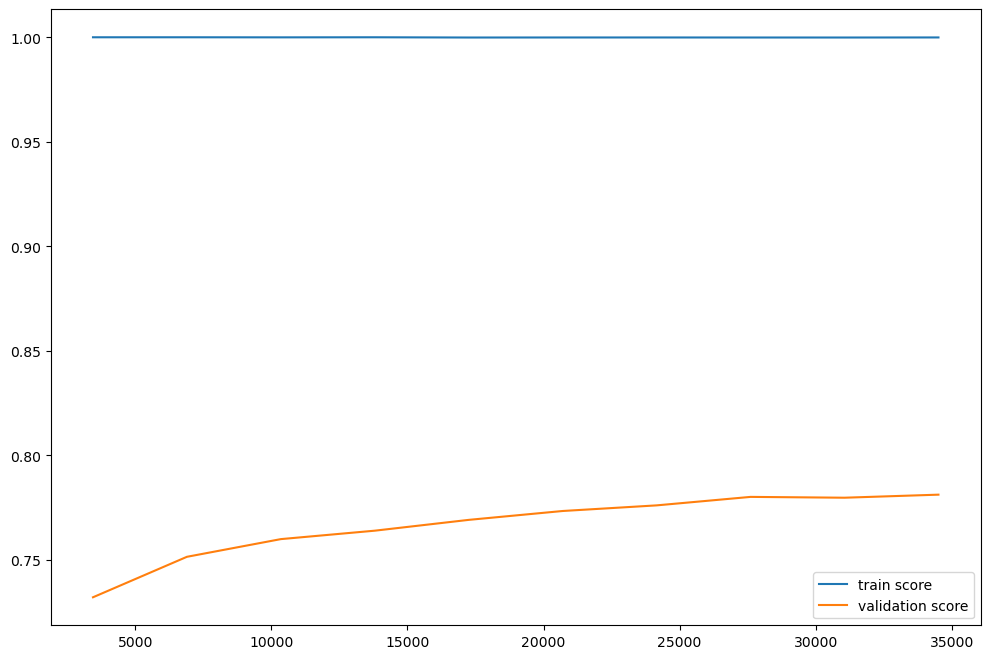

In [438]:
evaluation(model)

Ce modèle est en overfitting. Il n'est pas adapté pour traiter des données futures. Alors il régler ses hyperparamètres pour obtenir le moins d'overfitting possible

<Axes: >

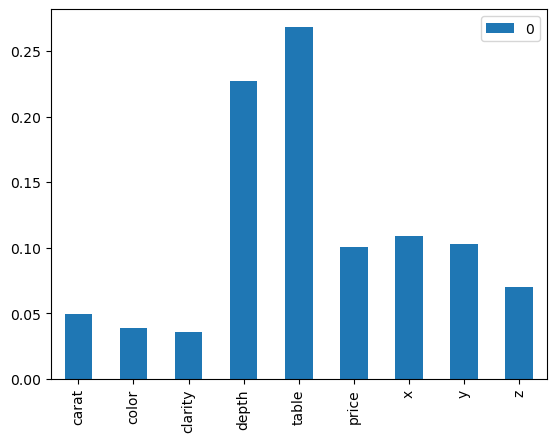

In [439]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

Ce graphique est très utiles pour voir l'importance de chaque feature pour ce modèle. Mais après réglages avec selectKBest, je n'en suit pas arrivée avec de meilleurs résultats. Avec de la feature engineering pour l'instant je n'ai pas trouvé d'outil bien meilleur.

[[ 294   30    7    7    2]
 [  40  537  255  139   17]
 [   3   82  703  954  621]
 [   0    8  144 2296  320]
 [   4    5  123  223 3970]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86       340
           2       0.81      0.54      0.65       988
           3       0.57      0.30      0.39      2363
           4       0.63      0.83      0.72      2768
           5       0.81      0.92      0.86      4325

    accuracy                           0.72     10784
   macro avg       0.74      0.69      0.70     10784
weighted avg       0.71      0.72      0.70     10784



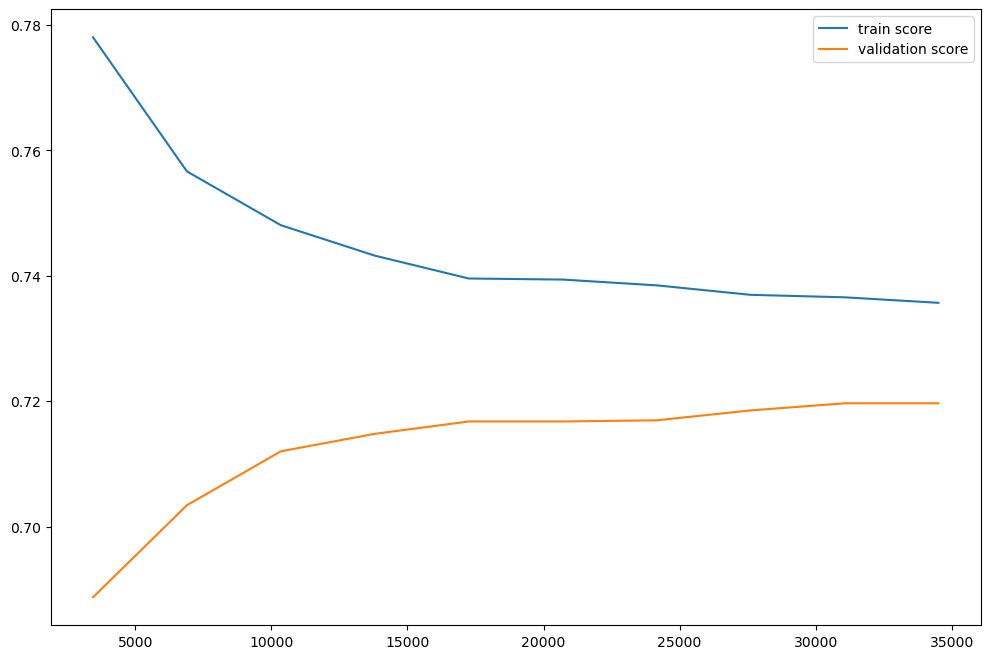

In [473]:
model = make_pipeline(SelectKBest(f_classif, k=2), RandomForestClassifier(random_state=0))
evaluation(model)

### 3. MODELISATION

**3.1. CHOIX DU MODELE**

In [474]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


RandomForest
[[ 304   27    5    3    1]
 [  26  690  225   31   16]
 [   2  136 1296  425  504]
 [   0   17  220 2212  319]
 [   5    9  175  162 3974]]
              precision    recall  f1-score   support

           1       0.90      0.89      0.90       340
           2       0.78      0.70      0.74       988
           3       0.67      0.55      0.61      2363
           4       0.78      0.80      0.79      2768
           5       0.83      0.92      0.87      4325

    accuracy                           0.79     10784
   macro avg       0.79      0.77      0.78     10784
weighted avg       0.78      0.79      0.78     10784

Adaboost
[[ 258   68    6    5    3]
 [  72  442  308  147   19]
 [  32  348  276 1018  689]
 [  13   46   31 2337  341]
 [   3   14   53  220 4035]]
              precision    recall  f1-score   support

           1       0.68      0.76      0.72       340
           2       0.48      0.45      0.46       988
           3       0.41      0.12      0.18 

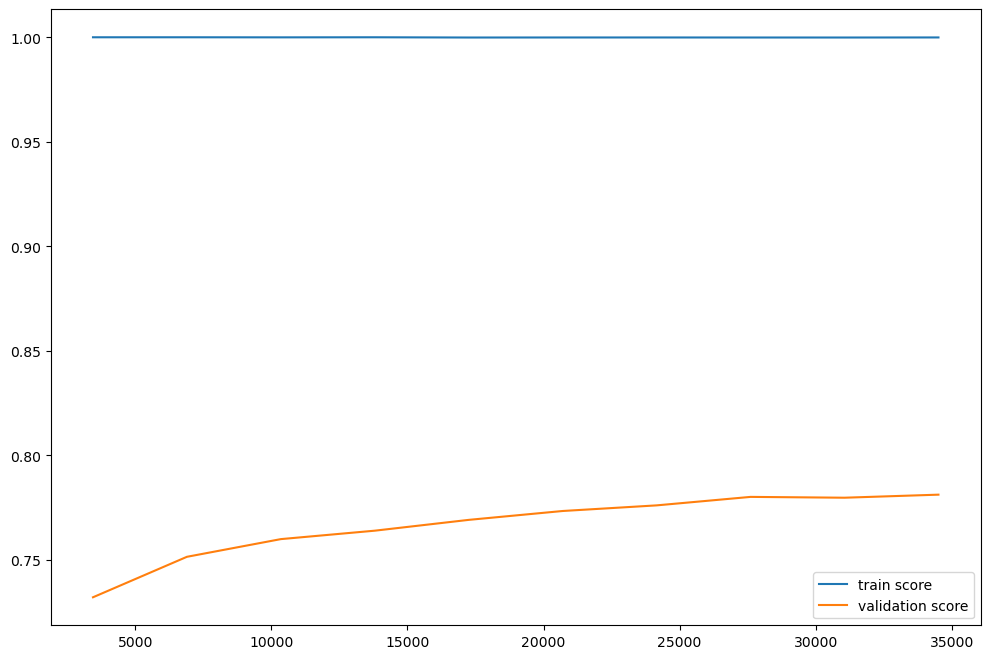

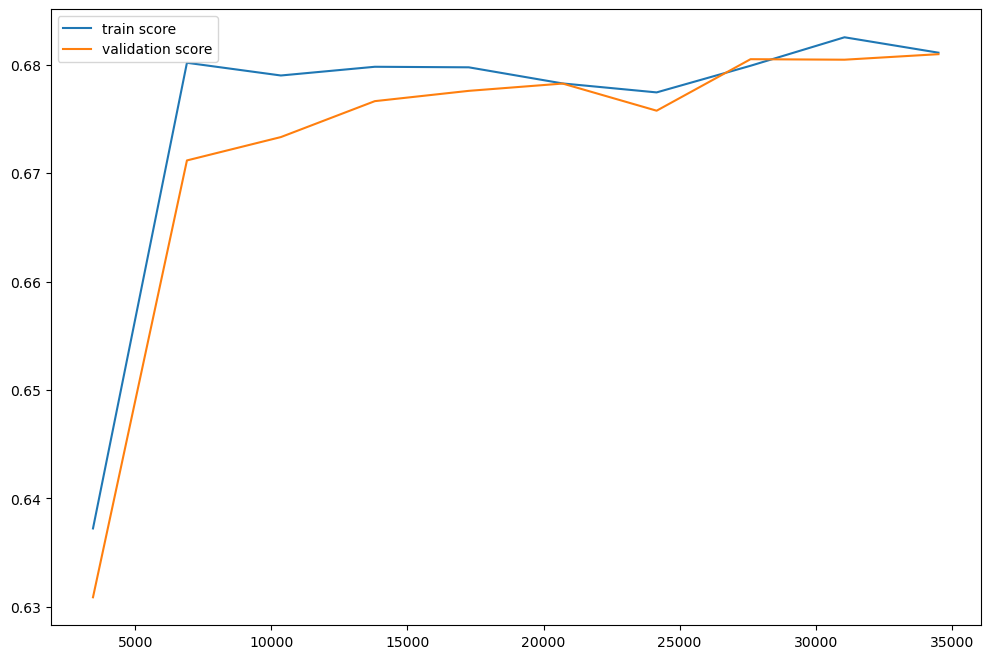

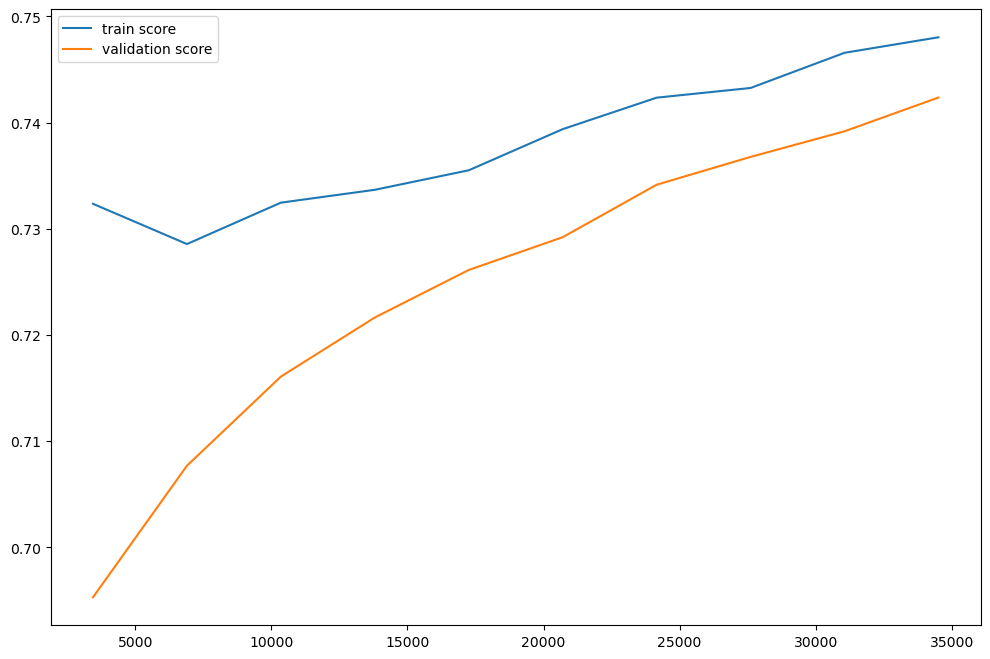

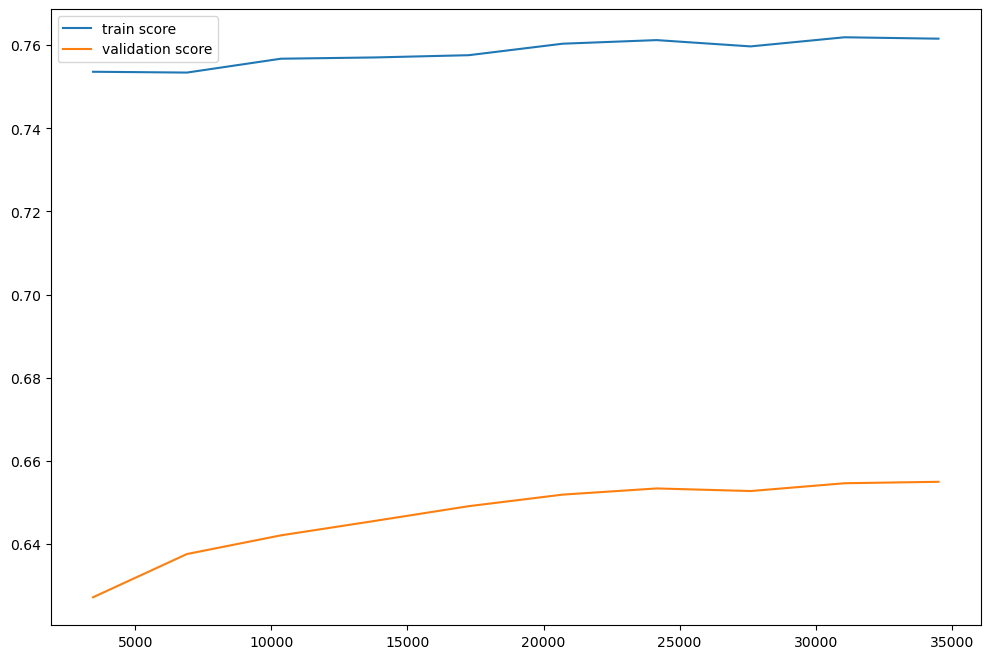

In [475]:
RandomForest = RandomForestClassifier(random_state=0)
Adaboost = AdaBoostClassifier(random_state=0)
svm = make_pipeline(StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())

dict_of_models = {'RandomForest' : RandomForest, 
                  'Adaboost' : Adaboost, 
                  'svm' : svm, 
                  'KNN': KNN}

for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

**Les modèles de AdaBoost et de SVM** résistent mieux à l'overfitting que les autres modèles. Ce sont ceux que je vais chercher à optimiser.

**3.2. OPTIMISATION**

In [476]:
svm

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [477]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C': [1, 10, 100, 1000], 
    'svc__gamma' : [1e-3, 1e-4]
}

grid = GridSearchCV(svm, param_grid, scoring = 'accuracy', cv=4)

grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred ))

{'svc__C': 1000, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           1       0.89      0.76      0.82       340
           2       0.68      0.57      0.62       988
           3       0.56      0.57      0.56      2363
           4       0.84      0.71      0.77      2768
           5       0.80      0.91      0.85      4325

    accuracy                           0.75     10784
   macro avg       0.75      0.70      0.72     10784
weighted avg       0.75      0.75      0.74     10784



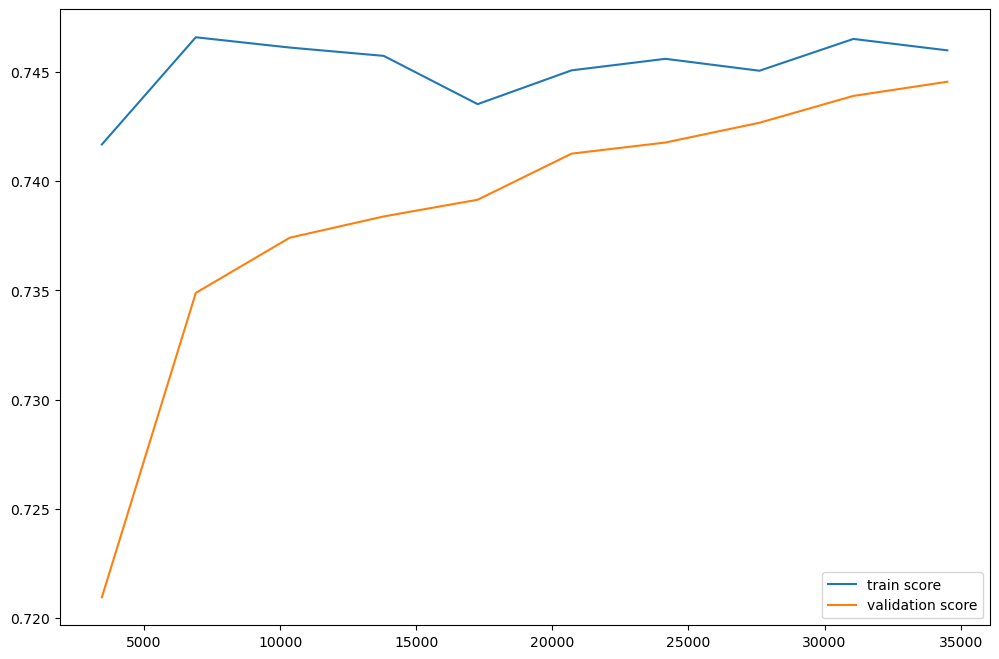

In [479]:
model = make_pipeline(StandardScaler(), SVC(random_state=0, C = 1000, gamma = 0.001))

# Dessinons la courbe d'apprentissage
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='accuracy',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

In [478]:
Adaboost

AdaBoostClassifier(random_state=0)

In [480]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate' : [0.01, 0.1, 0.5]
}

grid = GridSearchCV(Adaboost, param_grid, scoring = 'accuracy', cv=4)

grid.fit(X_train, y_train)
print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred ))

{'learning_rate': 0.5, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.75      0.34      0.47       340
           2       0.44      0.29      0.35       988
           3       0.47      0.24      0.31      2363
           4       0.62      0.85      0.72      2768
           5       0.80      0.93      0.86      4325

    accuracy                           0.68     10784
   macro avg       0.62      0.53      0.54     10784
weighted avg       0.65      0.68      0.64     10784



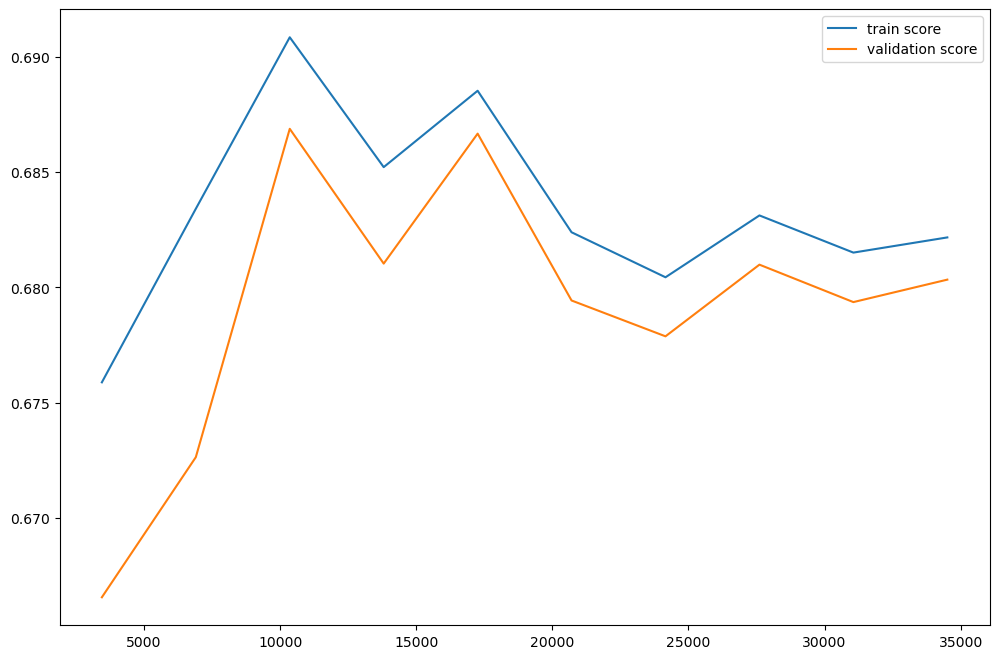

In [481]:
model = AdaBoostClassifier(random_state=0, learning_rate = 0.5, n_estimators = 100)
# Dessinons la courbe d'apprentissage
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='accuracy',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

**3.3. SUPPRESSION DES OUTLIERS**

In [443]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]


In [444]:
# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(data, 'price')

outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


<Axes: xlabel='cut', ylabel='count'>

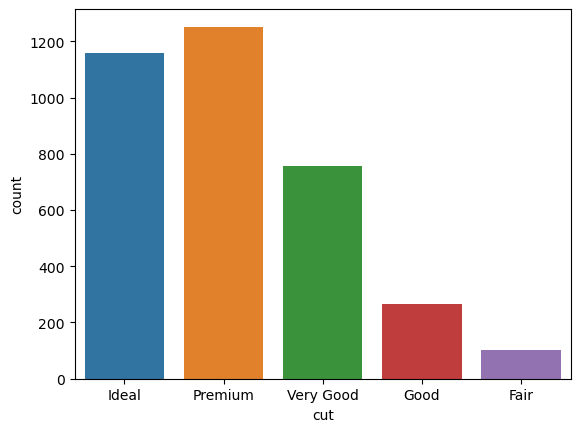

In [445]:
coupe = outliers["cut"].value_counts().reset_index()
sns.barplot(x='cut', y = 'count', data=coupe)

In [446]:
def suppression_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] <= upper_bound) & (data[column] >= lower_bound)]


In [447]:
data = suppression_outliers_iqr(data, 'price')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [451]:
data.shape

(50388, 10)

In [452]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size = 0.2, random_state=0 )

In [453]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

cut
5    16294
4    10018
3     9066
2     3726
1     1206
Name: count, dtype: int64
cut
5    4096
4    2510
3    2258
2     912
1     302
Name: count, dtype: int64


[[ 203   82    4    6    7]
 [  71  345  350  126   20]
 [  21  283  451  917  586]
 [  12   45   53 2104  296]
 [   2    6  110  199 3779]]
              precision    recall  f1-score   support

           1       0.66      0.67      0.66       302
           2       0.45      0.38      0.41       912
           3       0.47      0.20      0.28      2258
           4       0.63      0.84      0.72      2510
           5       0.81      0.92      0.86      4096

    accuracy                           0.68     10078
   macro avg       0.60      0.60      0.59     10078
weighted avg       0.65      0.68      0.65     10078



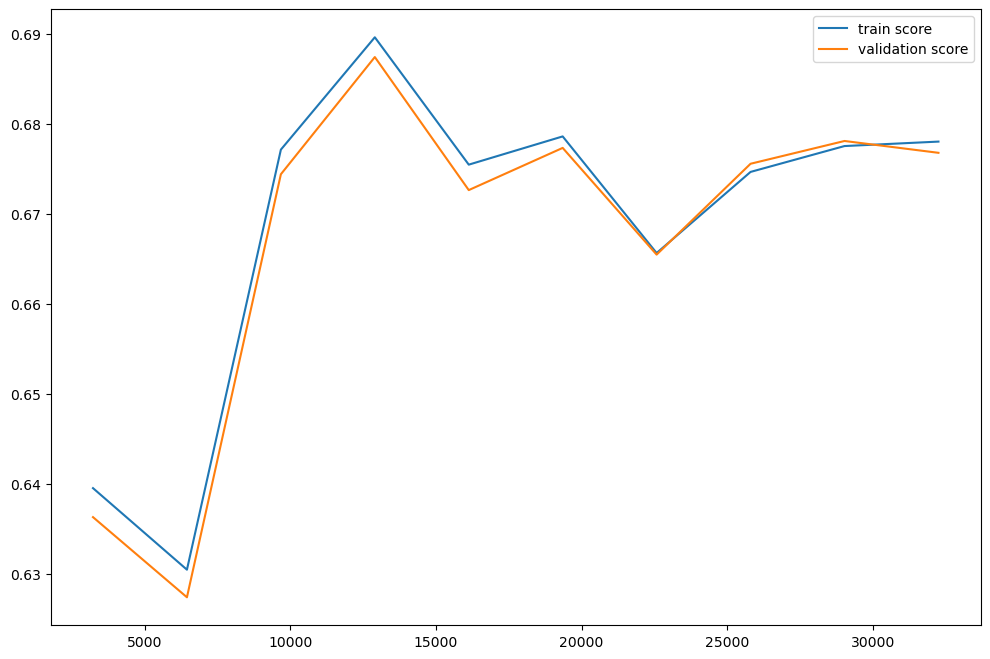

In [454]:
Adaboost = AdaBoostClassifier(random_state=0)
evaluation(Adaboost)

[[ 263   22    6    7    4]
 [  22  666  172   36   16]
 [   0  144 1241  390  483]
 [   0    9  216 2007  278]
 [   2    4  184  140 3766]]
              precision    recall  f1-score   support

           1       0.92      0.87      0.89       302
           2       0.79      0.73      0.76       912
           3       0.68      0.55      0.61      2258
           4       0.78      0.80      0.79      2510
           5       0.83      0.92      0.87      4096

    accuracy                           0.79     10078
   macro avg       0.80      0.77      0.78     10078
weighted avg       0.78      0.79      0.78     10078



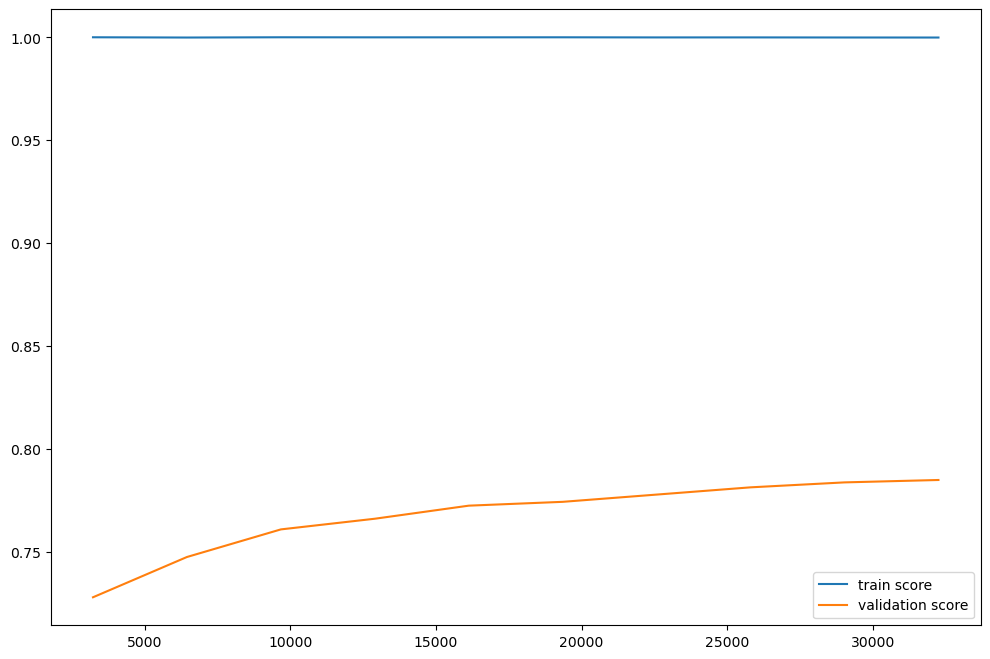

In [455]:
RandomForest = RandomForestClassifier(random_state=0)
evaluation(RandomForest)

[[ 220   67    5    7    3]
 [  16  577  263   37   19]
 [   0  174 1044  468  572]
 [   0   20  216 1982  292]
 [   3    4  159  156 3774]]
              precision    recall  f1-score   support

           1       0.92      0.73      0.81       302
           2       0.69      0.63      0.66       912
           3       0.62      0.46      0.53      2258
           4       0.75      0.79      0.77      2510
           5       0.81      0.92      0.86      4096

    accuracy                           0.75     10078
   macro avg       0.76      0.71      0.73     10078
weighted avg       0.74      0.75      0.74     10078



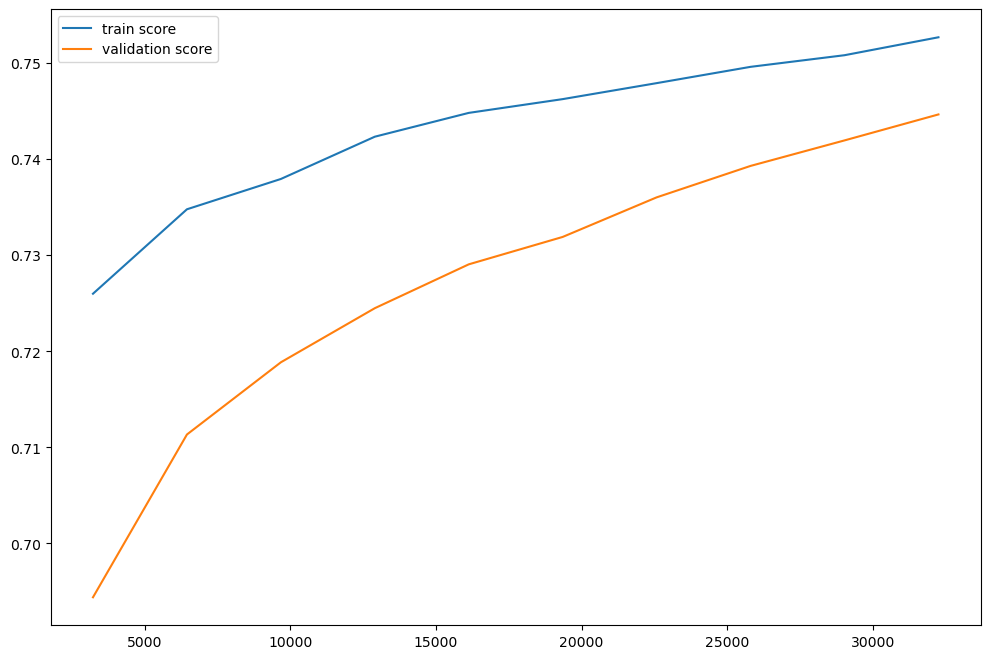

In [456]:
svm = make_pipeline(StandardScaler(), SVC(random_state=0))
evaluation(svm)

**LA SUPPRESSION DES OUTLIERS N'AFFECTENT PAS LES PERFORMANCES DU MODELE**

Les modèles avec des performances interessantes semblent être **le SVM si on lui apportent beaucoup plus de données et le modèle AdaBoost**.

## AJOUTONS DES DONNEES A CES MODELES

In [1119]:
data = diamond.copy()
data = data.drop(data[data["z"]==0].index)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [1128]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    #df = feature_engineering(df)
    
    X = df.drop('cut', axis=1)
    y = df['cut']
    
    #print(y.value_counts())
    
    return X, y

In [1129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size = 0.05, random_state=0 ) # ajoutons les données au train set
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

In [1132]:
testset.shape

(2696, 10)

In [1130]:
def evaluation(model):
    
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred ))
    print(classification_report(y_test, ypred ))
    
    #VERIFICATION DES COURBES D'APPRENTISSAGE
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                              cv=5, scoring='accuracy',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[ 62  23   3   0   0]
 [  8 143  86   5   3]
 [  0  44 340  47 173]
 [  0   5 122 468  74]
 [  3   1  62  42 982]]
              precision    recall  f1-score   support

           1       0.85      0.70      0.77        88
           2       0.66      0.58      0.62       245
           3       0.55      0.56      0.56       604
           4       0.83      0.70      0.76       669
           5       0.80      0.90      0.85      1090

    accuracy                           0.74      2696
   macro avg       0.74      0.69      0.71      2696
weighted avg       0.74      0.74      0.74      2696



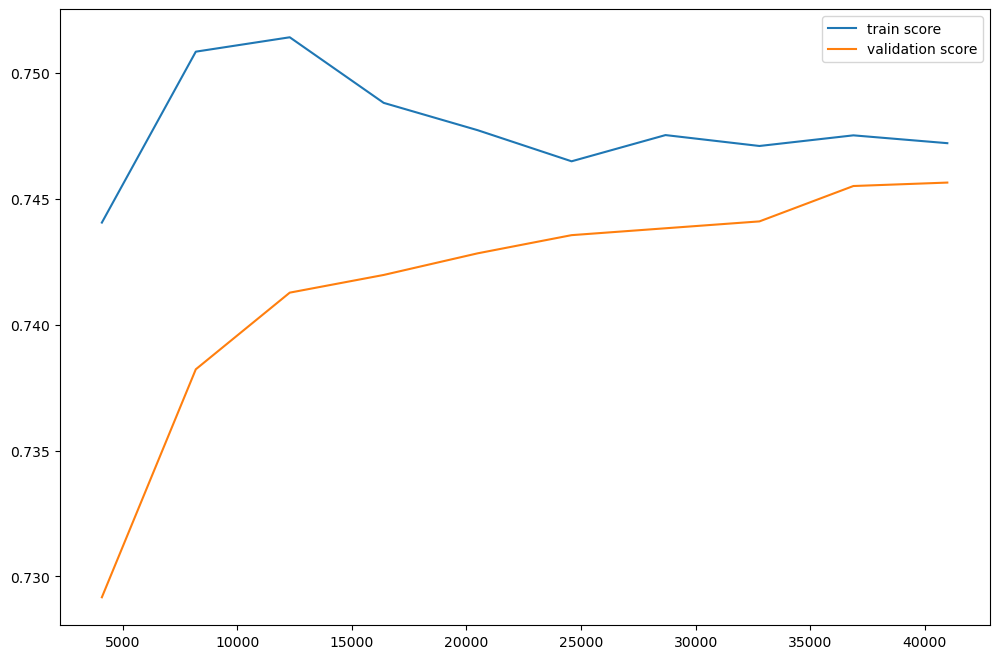

In [1133]:
model = make_pipeline(StandardScaler(), SVC(random_state=0, C = 1000, gamma = 0.001))

evaluation(model)

[[  17   66    2    2    1]
 [   3   86  118   33    5]
 [   0   42  129  250  183]
 [   1    7    7  569   85]
 [   1    4   16   64 1005]]
              precision    recall  f1-score   support

           1       0.77      0.19      0.31        88
           2       0.42      0.35      0.38       245
           3       0.47      0.21      0.29       604
           4       0.62      0.85      0.72       669
           5       0.79      0.92      0.85      1090

    accuracy                           0.67      2696
   macro avg       0.61      0.51      0.51      2696
weighted avg       0.64      0.67      0.63      2696



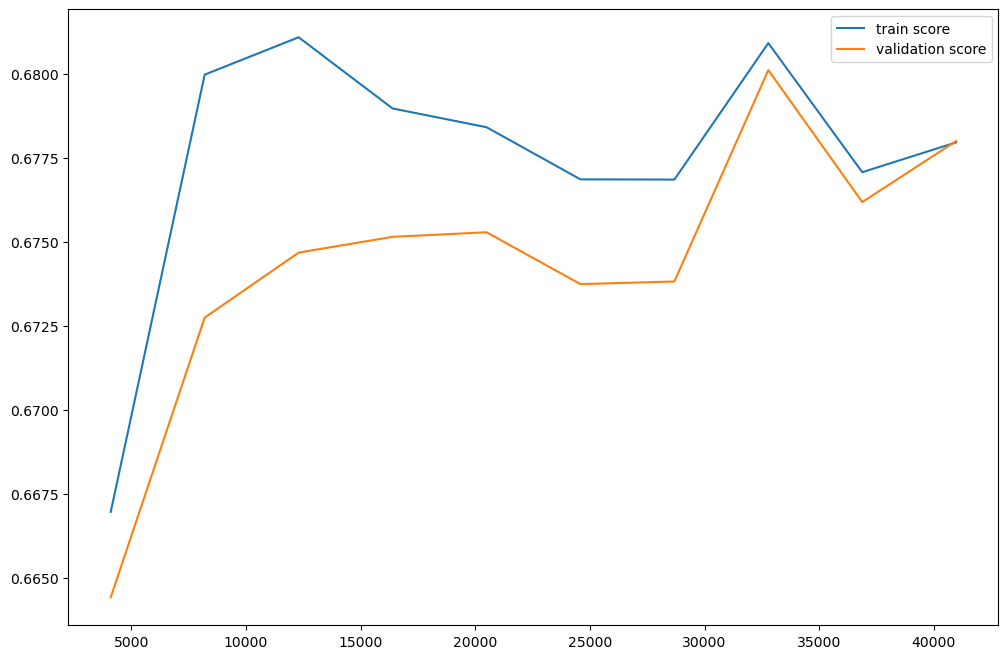

In [1131]:
model = AdaBoostClassifier(random_state=0, learning_rate = 0.5, n_estimators = 100)

evaluation(model)

Même en ajoutant les données, les performances de ces modèles ne sont pas meilleures, mais AdaBoost resiste mieux à l'overfitting. Le score f1 est meilleur pour le modèle SVM pour la majorité des classes. **L'exactitude est de 75%**

Le meilleur modèle que j'ai trouvé est le modèle **SVM** avec les paramètres suivants :

    - feature scaling : avec standardscaler
    - le coefficient de pénalité C = 1000
    - le coefficient gamma = 0.001
    
Cela me permet d'atteindre une performance sur le score **f1** de plus de **50%** pour toutes les classes et une exactitude totale de **75%**